## CD1 IVSA FR1 Correct Rate

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# curr_dir = os.getcwd()
# parent_dir = os.path.join(curr_dir, os.pardir)
# parent_dir = os.path.join(parent_dir, 'scripts')
# sys.path.append(parent_dir)
# print(sys.path[-1])
import intervals as invs
from accuracy import graph_cumulative_acc, instant_acc, time_high_acc, graph_instant_acc, graph_avg_corr_rate
from preprocessing import read_csv_clean, calculate_accuracy_by_row
import paths

In [1]:
ctrl_ending_corr = []
ivsa_ending_corr = []
ctrl_dict_corr = {}
ivsa_dict_corr = {}
ending = []

def read_and_record(path:str, ending_corr:list, dict_corr:list):
    df = read_csv_clean(path)
    df = calculate_accuracy_by_row(df)
    value = df['Percent_Correct'].tail(1).values[0]
    # key = path
    ending_corr.append(value)
    # dict_corr[key] = value
    return df

In [ ]:
for path in paths.fr1_ivsa:
    read_and_record(path, ending, None)

In [15]:
ending

In [ ]:
plt.figure(figsize=(4, 5))
plt.scatter([1]*len(ending), ending, marker='o', color='blue', zorder=2) 
plt.show()

In [5]:
paths.fr1_ivsa[18]

'/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/FR1/FED000_072122_06.CSV'

In [2]:
acc = instant_acc(path=paths.fr1_ivsa[0], csv=True)
data = read_csv_clean(path=paths.fr1_ivsa[0])

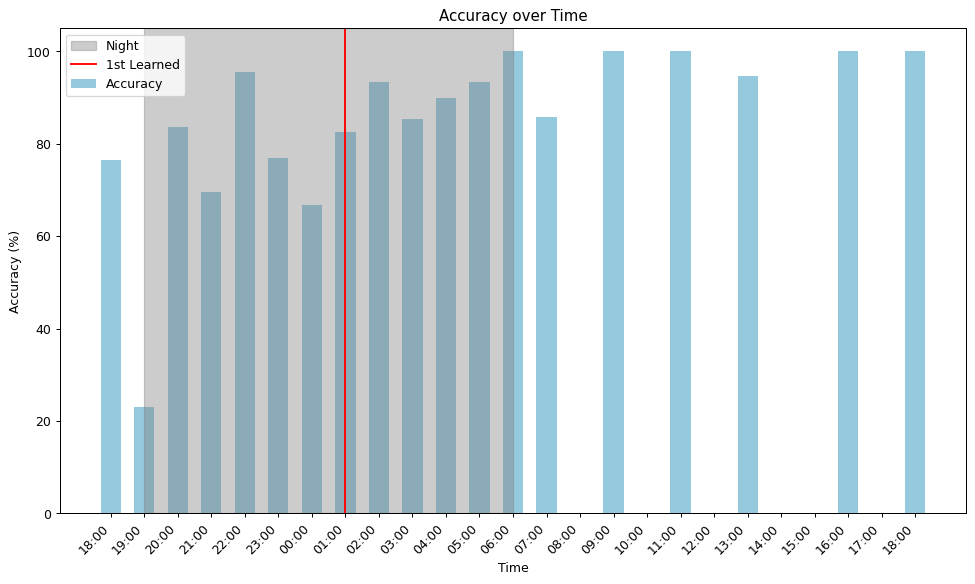

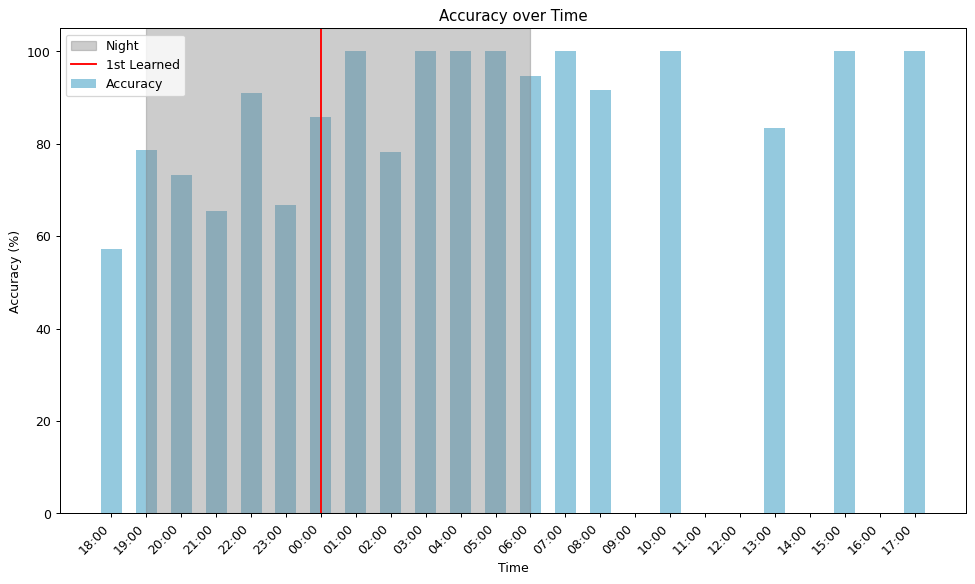

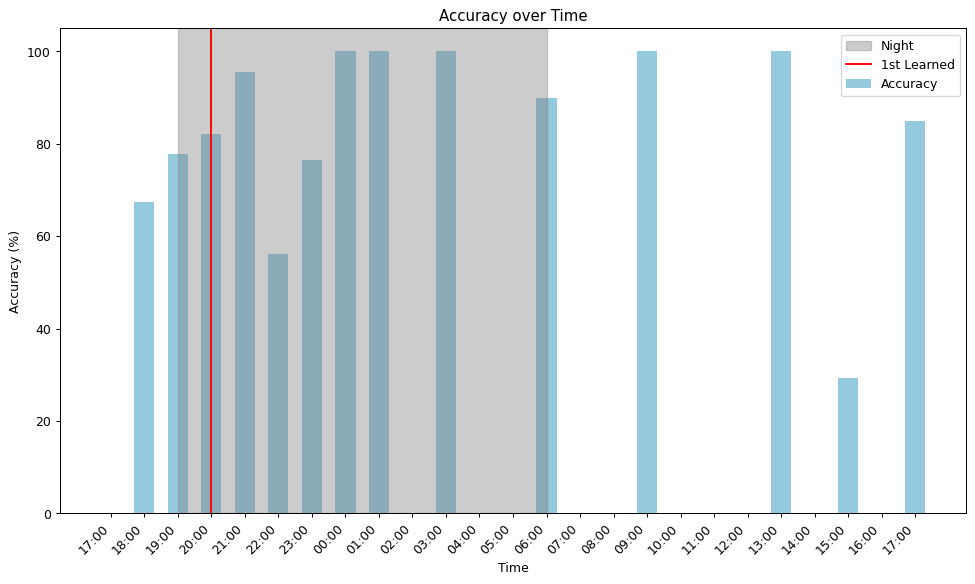

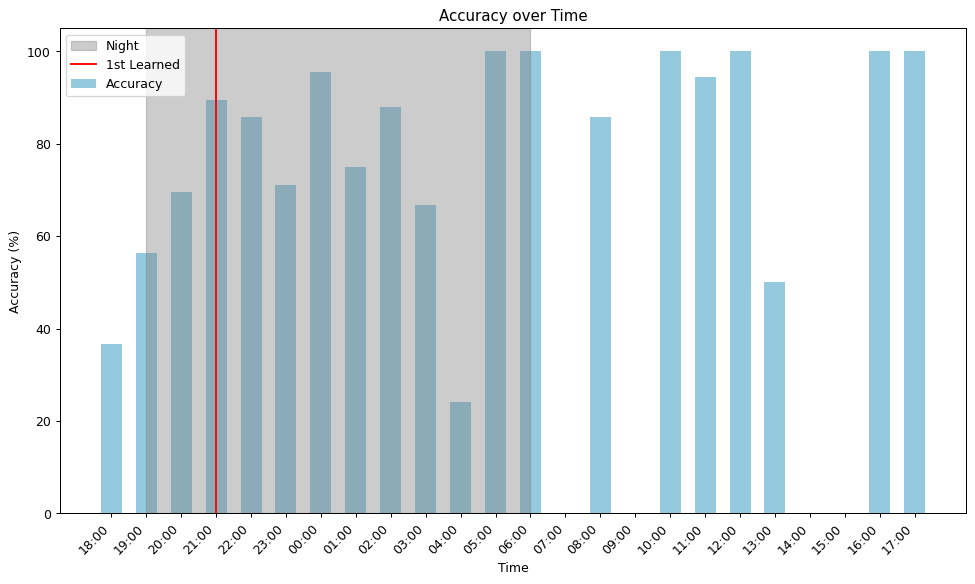

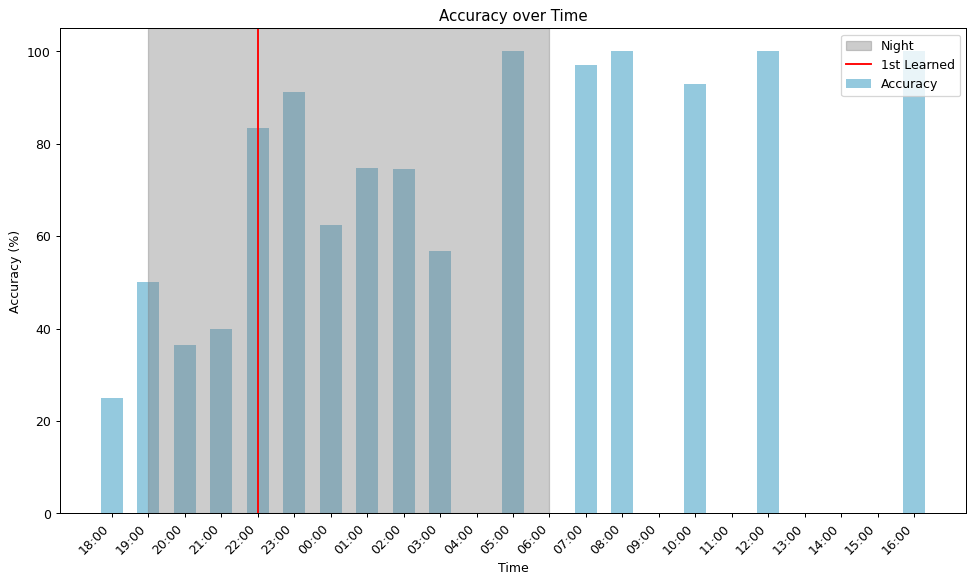

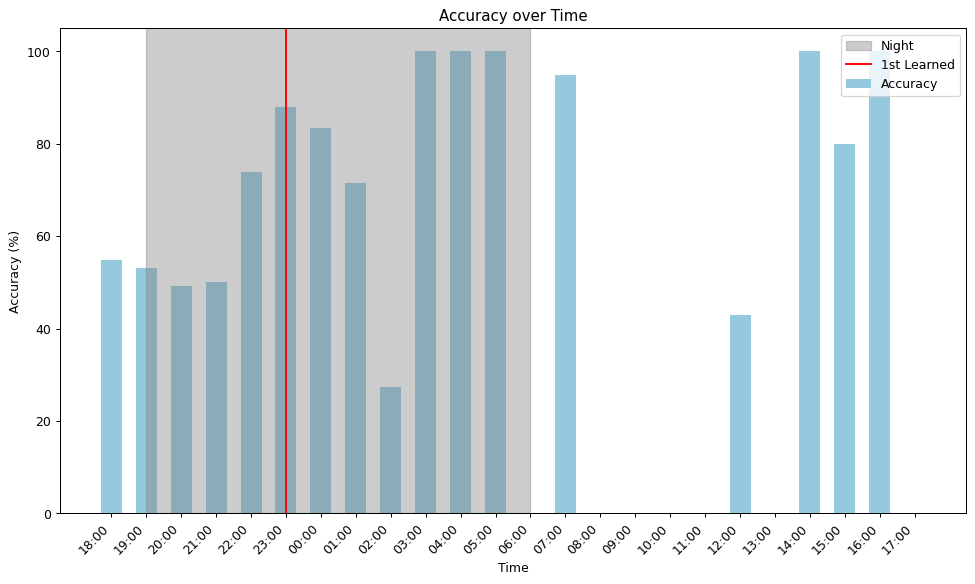

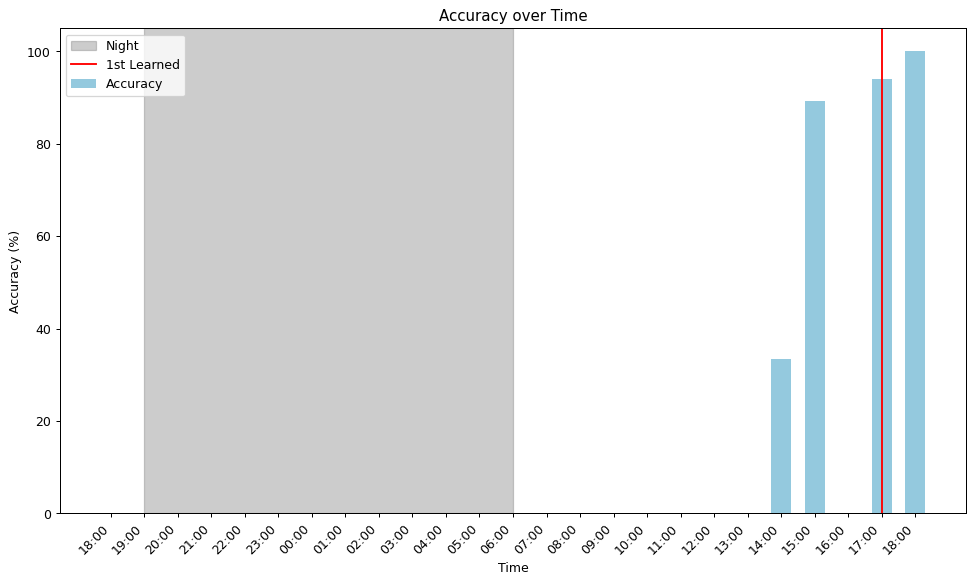

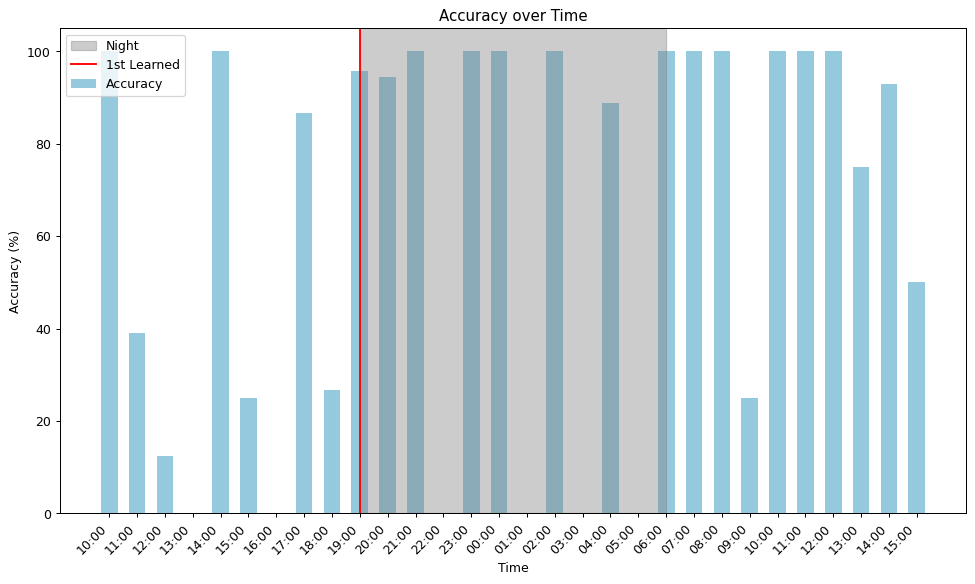

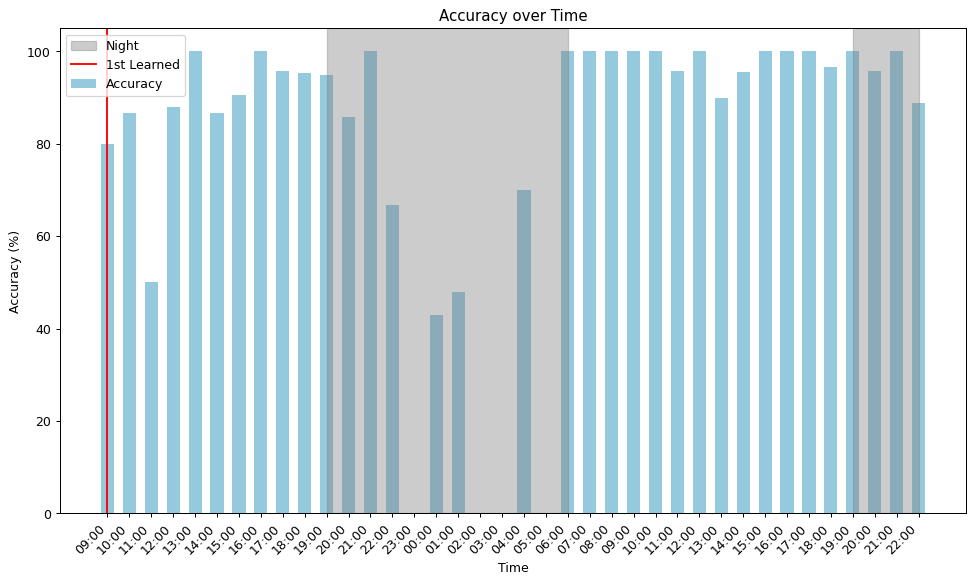

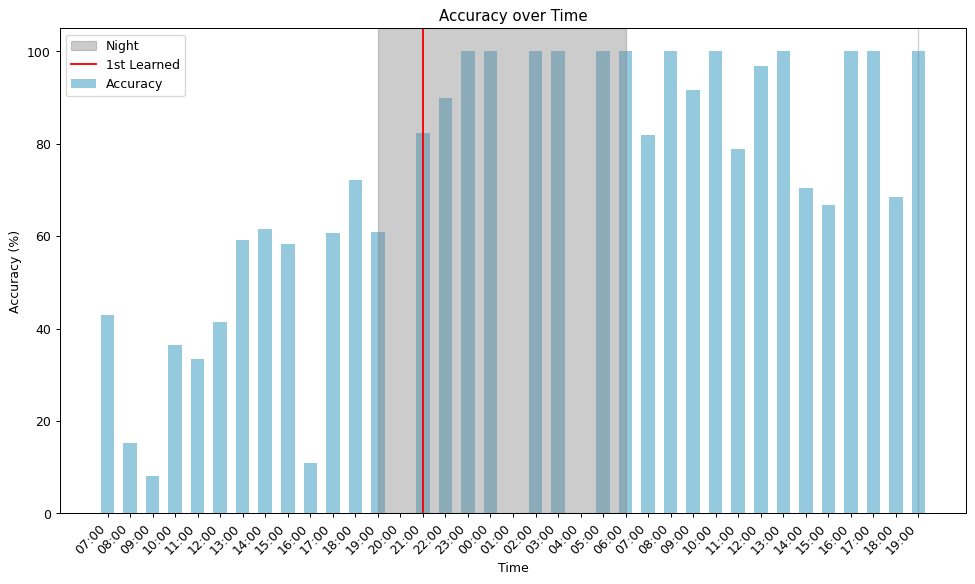

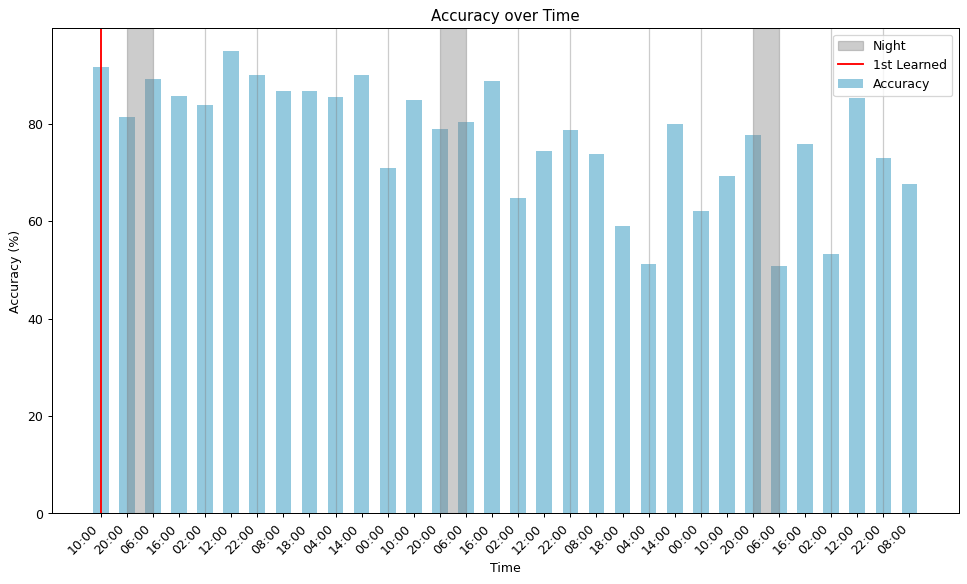

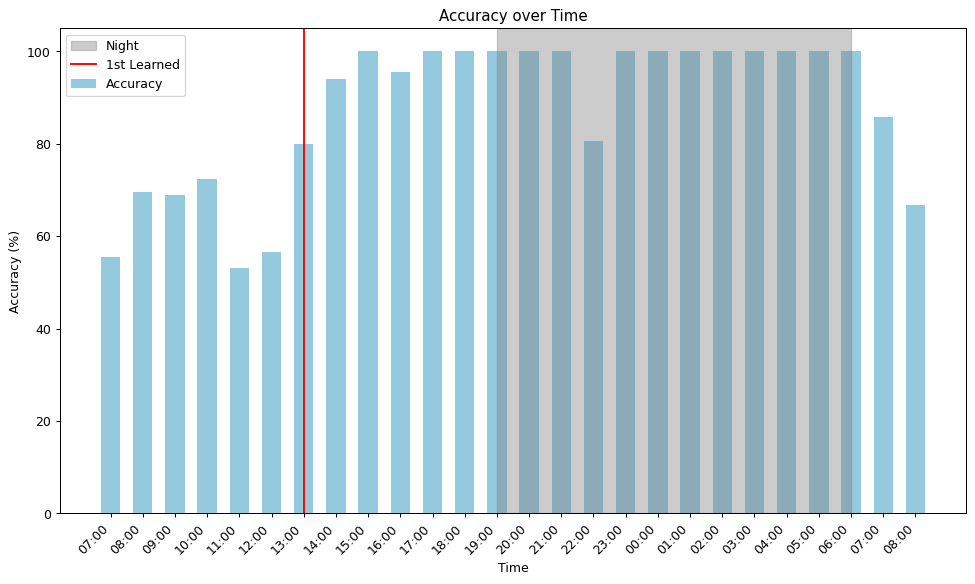

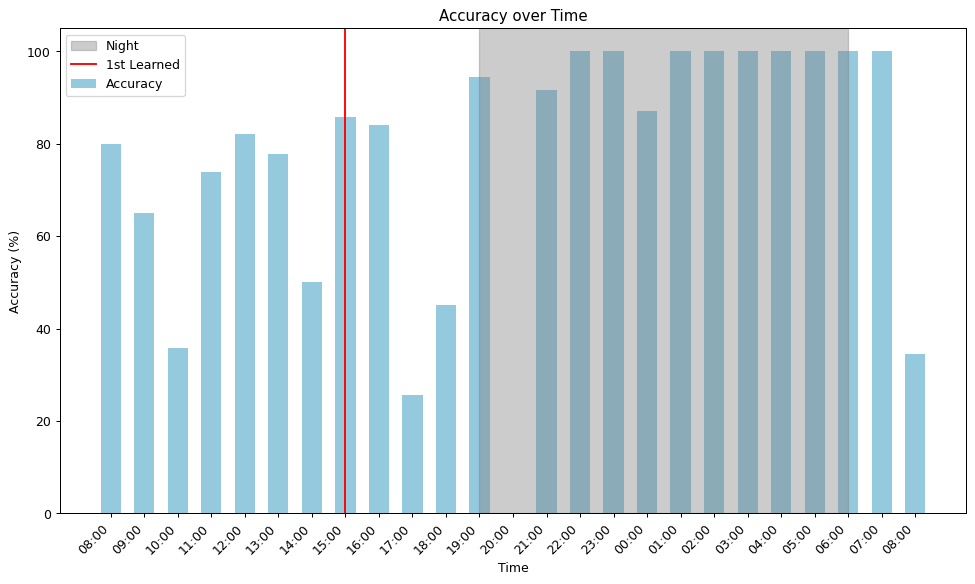

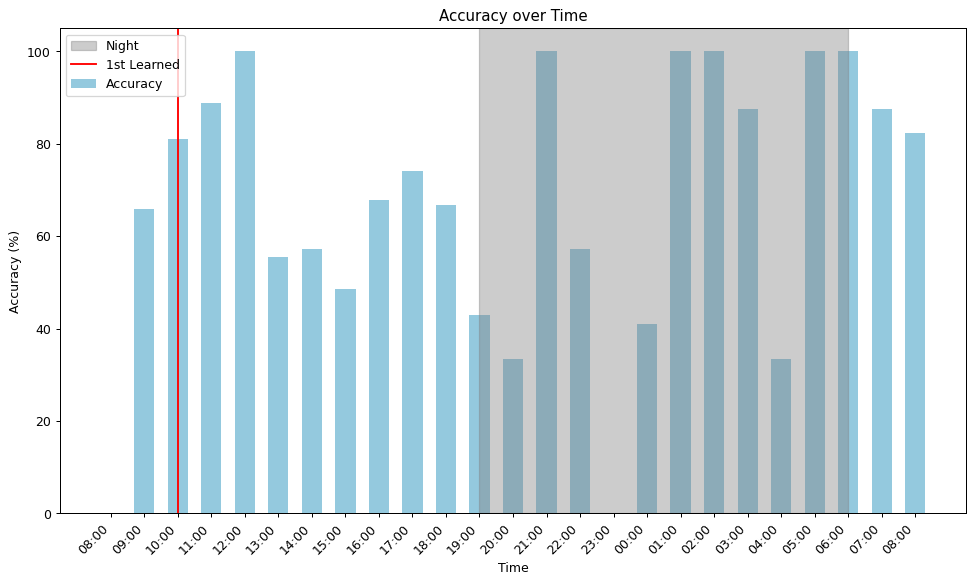

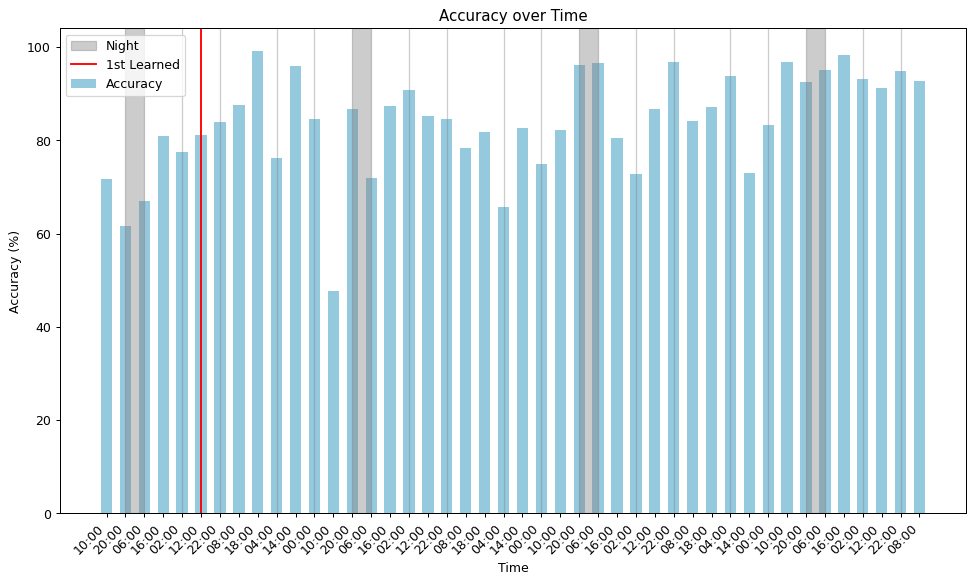

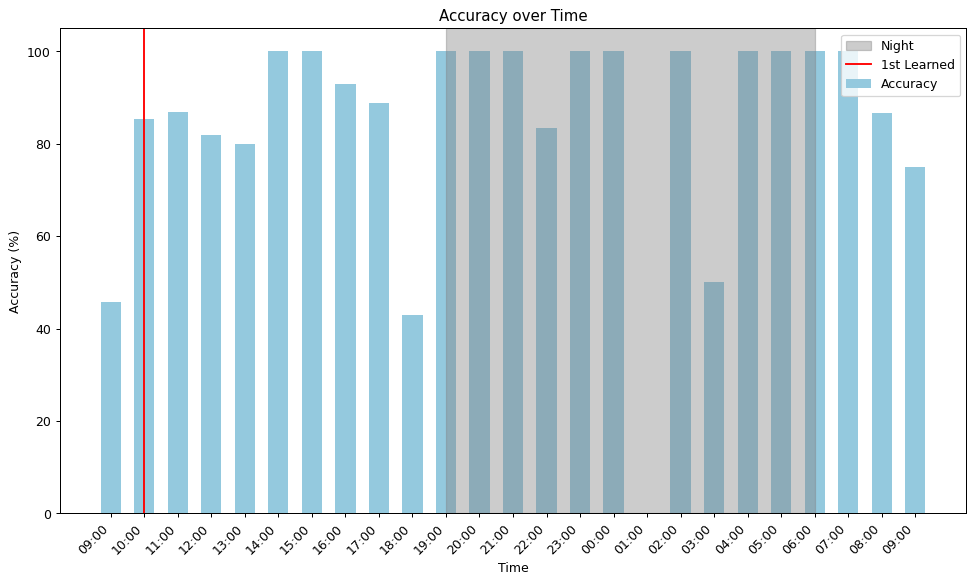

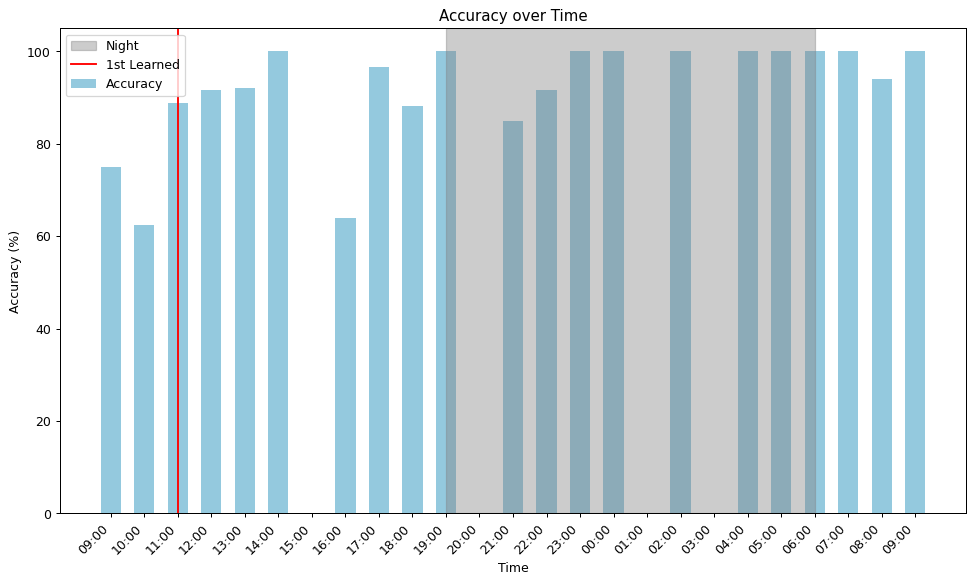

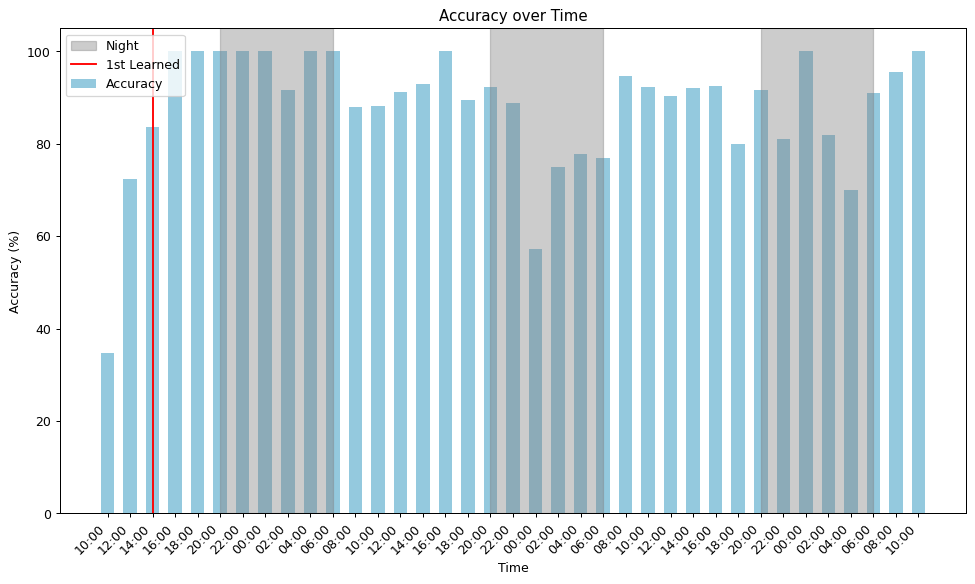

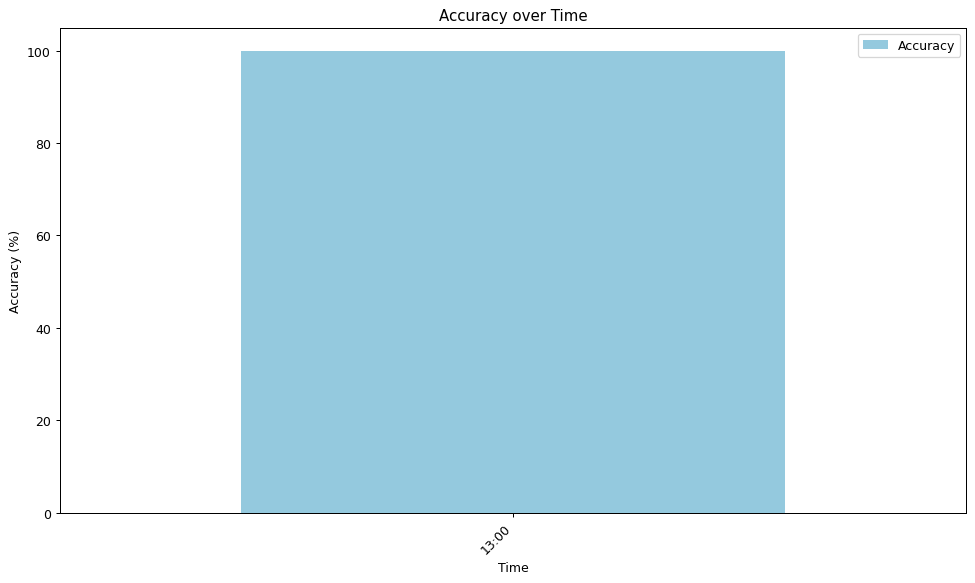

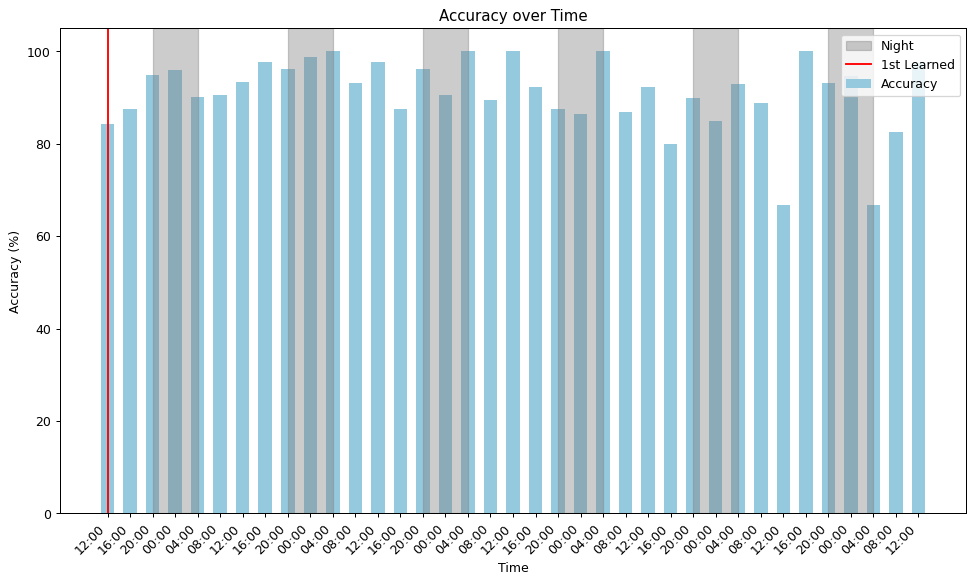

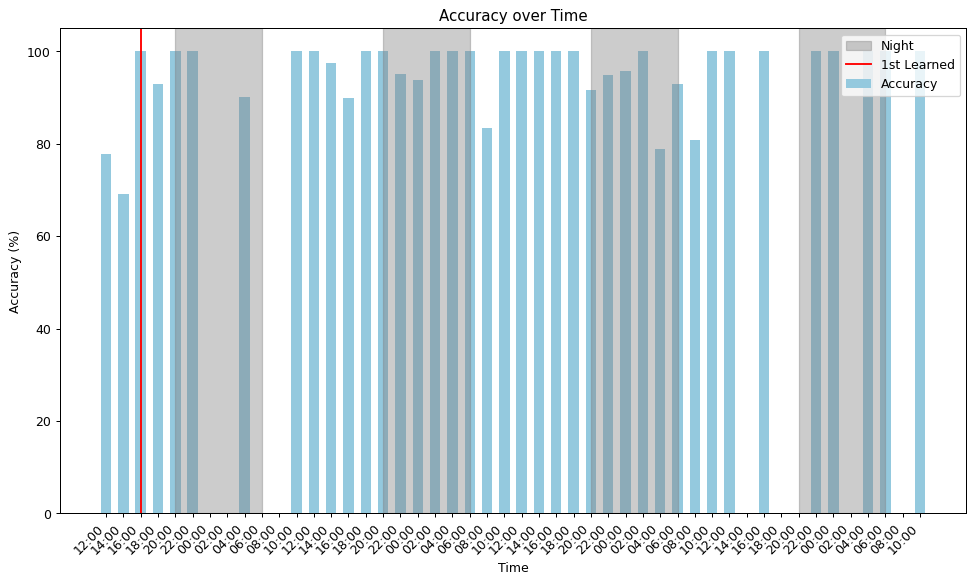

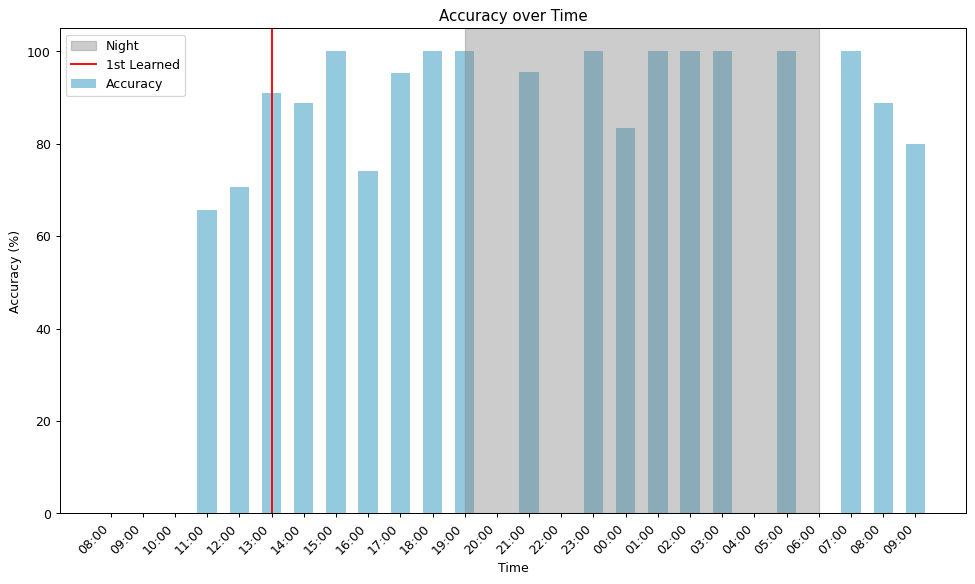

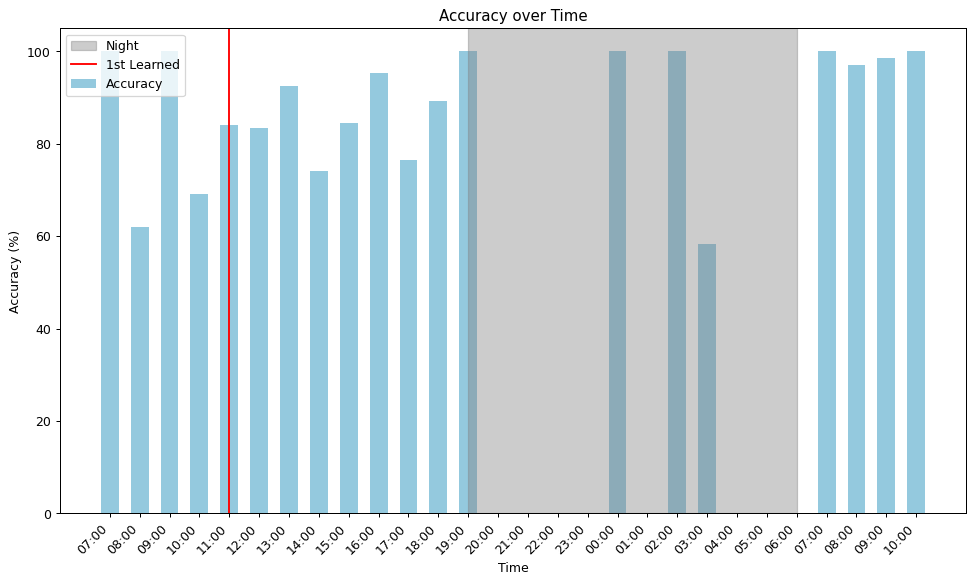

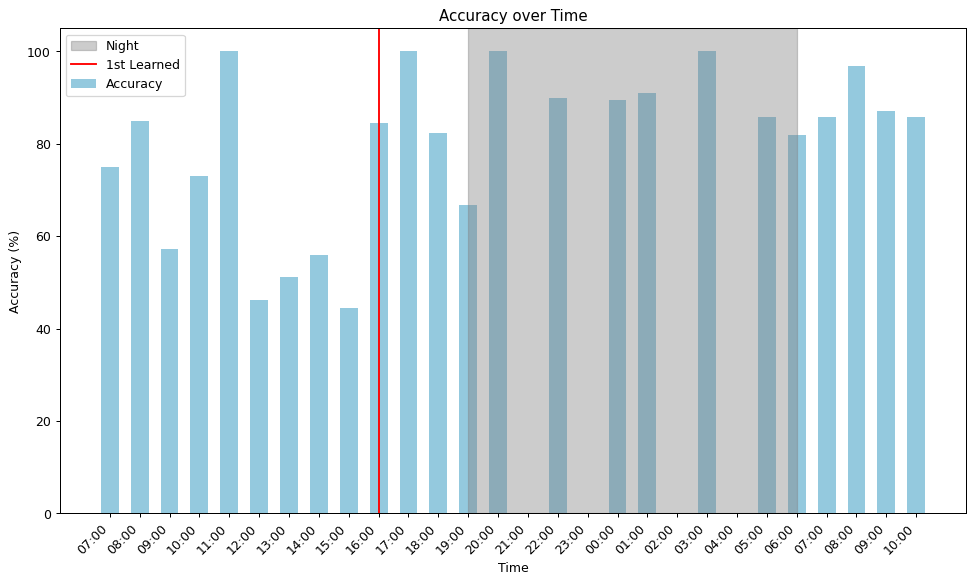

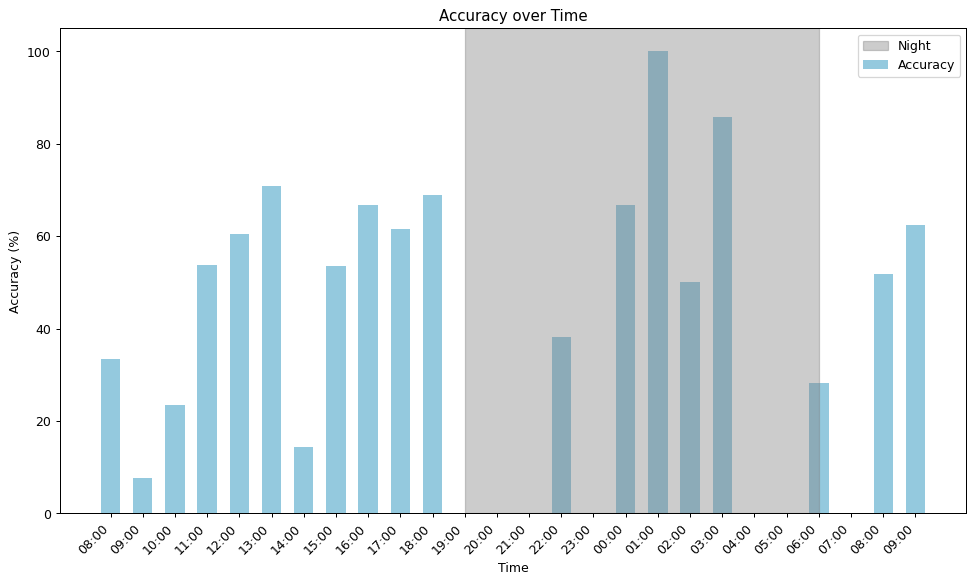

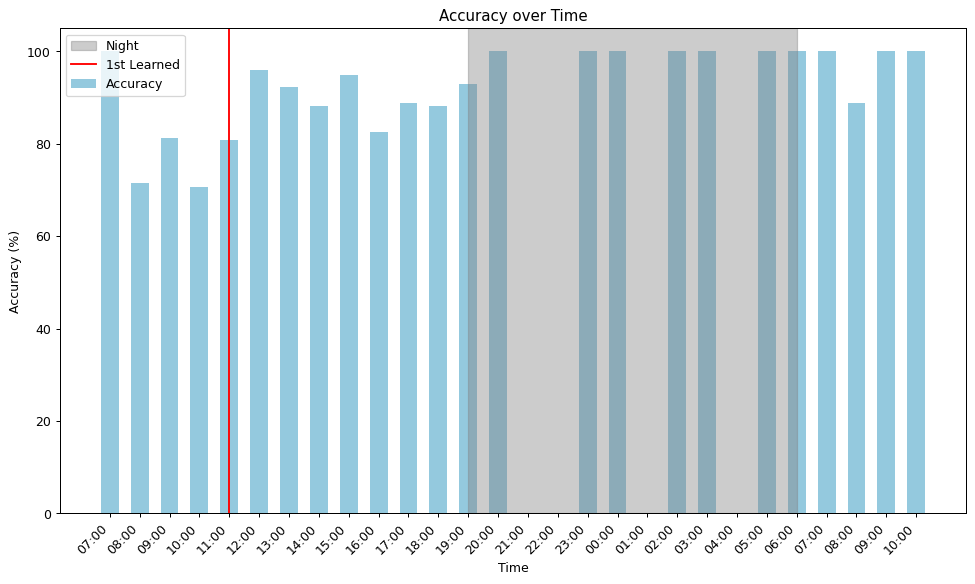

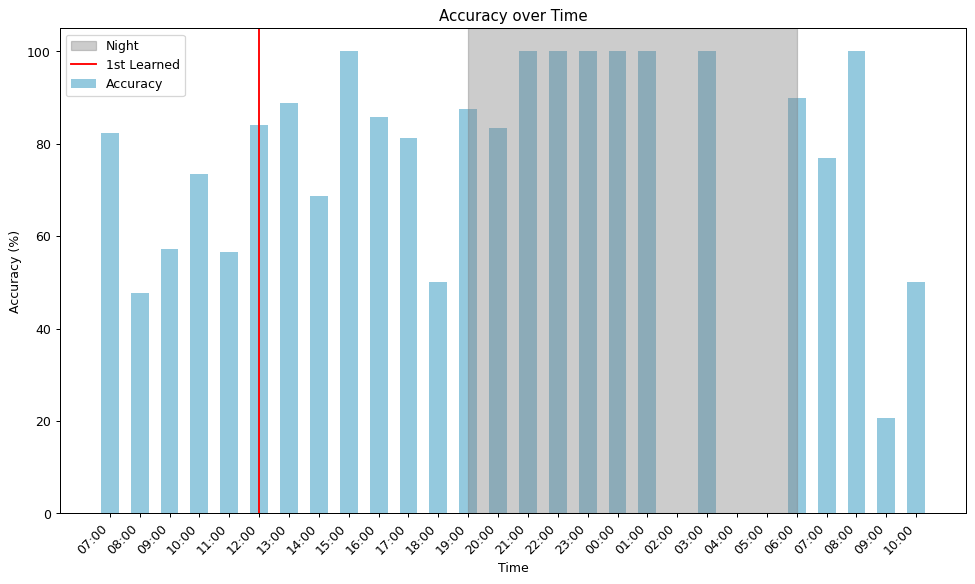

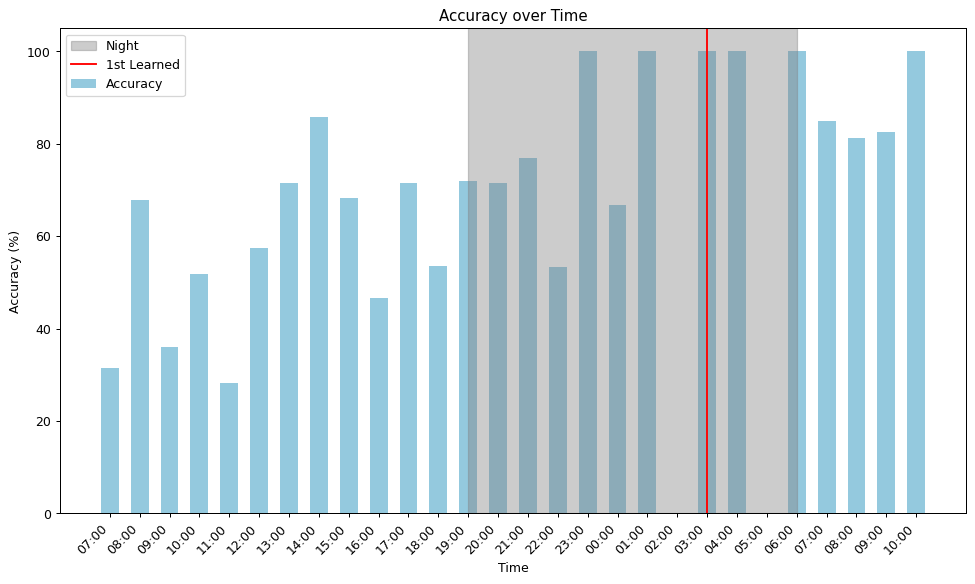

In [2]:
ctrl_times = []

for each in paths.fr1_ivsa:
    # print(each)
    data = instant_acc(path=each, csv=True)
    stamp, hrs = time_high_acc(data)
    ctrl_times.append(hrs)
    graph_instant_acc(data, None, None, stamp)